In [1]:
!pip install opencv-python torch torchvision mediapipe 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 38.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: nvid

In [2]:
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


2025-04-21 20:54:10.885245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745268851.184887      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745268851.274205      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
test_data = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg"
frame = cv2.imread(test_data)

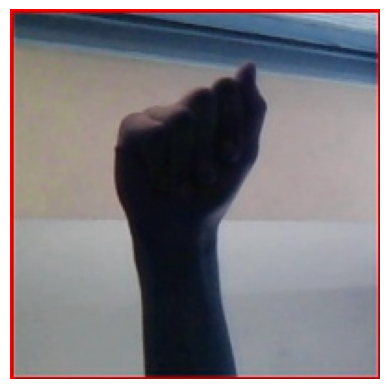

In [4]:
plt.imshow(frame)
plt.axis("off")
plt.show()

In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

In [ ]:
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Initialize Hands with static image mode
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    # Process the image and get the result
    results = hands.process(image_rgb)

    # Check if hands are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw landmarks on original image
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))

plt.imshow("Hand IMage",frame)
            


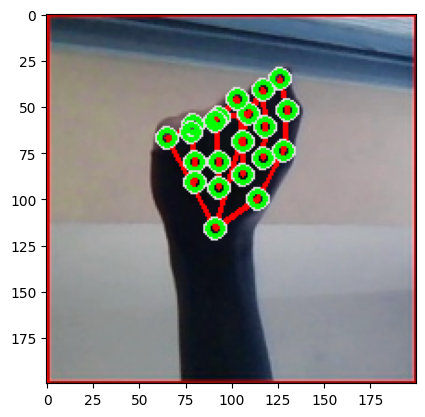

In [13]:
plt.imshow(frame)

In [64]:
labels_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

In [39]:
def draw_landmarks(img_path):
    frame = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Initialize Hands with static image mode
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        # Process the image and get the result
        results = hands.process(image_rgb)
    
        # Check if hands are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on original image
                mp_drawing.draw_landmarks(
                    frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    )
    return frame

In [65]:
vocab = [x for x in [""] + os.listdir(labels_path)]

In [66]:
vocab

['',
 'N',
 'R',
 'space',
 'B',
 'I',
 'del',
 'F',
 'H',
 'E',
 'U',
 'M',
 'X',
 'K',
 'Q',
 'Y',
 'S',
 'G',
 'A',
 'O',
 'T',
 'V',
 'Z',
 'C',
 'P',
 'L',
 'W',
 'D',
 'nothing',
 'J']

In [69]:
num_to_char = {key:value for key, value in enumerate(vocab)}
char_to_num = {value:key for key, value in enumerate(vocab)}

In [70]:
def load_label(path):
    label = path.split("/")[-2]
    return char_to_num[label]

In [71]:
def load_data(path):
    frame,label = draw_landmarks(path),load_label(path)
    return frame,label

In [72]:
import os

In [73]:
images_paths = [os.path.join(labels_path,key,value) for key in os.listdir(labels_path) for value in os.listdir(os.path.join(labels_path,key))] 

In [74]:
len(images_paths)

87000

In [101]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch

class ImageDataset(Dataset):
    def __init__(self,paths):
        self.paths = paths
    def __len__(self):
        return len(self.paths)
    def __getitem__(self,idx):
        path = self.paths[idx]
        self.frame,self.label = load_data(path)
        print(f"Load data {idx} of {len(self.paths)}")
        return torch.tensor(self.frame, dtype=torch.float32).permute(2,0,1),torch.tensor([self.label], dtype=torch.int64)
        

In [102]:
dataset = ImageDataset(images_paths)

In [103]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    """
    Pads the sequences in a batch to the same length.

    Args:
        batch: A list of (data, label) tuples.

    Returns:
        A tuple containing the padded data and labels.
    """
    # Separate data and labels
    data = [item[0] for item in batch]
    labels = [item[1] for item in batch]

    # Pad the data (video frames)
    # Assuming data is a list of tensors of shape (num_frames, channels, height, width)
    # We need to pad along the num_frames dimension (dim=0)
    padded_data = pad_sequence(data, batch_first=True, padding_value=0)

    # Pad the labels (alignments)
    # Assuming labels is a list of 1D tensors
    padded_labels = pad_sequence(labels, batch_first=True, padding_value=0) # Assuming -1 is not a valid label


    return padded_data, padded_labels

In [104]:
train_size = round(len(dataset) * 0.8)
val_size = len(dataset) - train_size

train_set, val_set = torch.utils.data.random_split(dataset, [train_size, val_size])


In [105]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, collate_fn=collate_fn)

In [106]:
train_data, train_label = next(iter(train_loader))

W0000 00:00:1745273354.238792     716 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.260492     716 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.317110     720 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.334787     720 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.390719     725 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.406944     725 inference_feedback_manager.cc:114] Feedback manager 

Load data 49099 of 87000
Load data 76686 of 87000
Load data 16825 of 87000


W0000 00:00:1745273354.477758     731 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.492199     731 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.561519     732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.579122     734 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.644965     736 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.662392     736 inference_feedback_manager.cc:114] Feedback manager 

Load data 68301 of 87000
Load data 74219 of 87000
Load data 50728 of 87000


W0000 00:00:1745273354.738371     743 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.754629     743 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.816022     745 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.833246     745 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.895034     748 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.911860     748 inference_feedback_manager.cc:114] Feedback manager 

Load data 43121 of 87000
Load data 21797 of 87000
Load data 9361 of 87000


W0000 00:00:1745273354.978816     753 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273354.992634     753 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.052892     757 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.067922     757 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.129175     761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.141625     761 inference_feedback_manager.cc:114] Feedback manager 

Load data 50516 of 87000
Load data 25706 of 87000
Load data 8133 of 87000


W0000 00:00:1745273355.189280     764 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.202898     764 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.266600     768 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.280728     768 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.328540     773 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.341038     773 inference_feedback_manager.cc:114] Feedback manager 

Load data 60352 of 87000
Load data 43737 of 87000
Load data 75722 of 87000


W0000 00:00:1745273355.404359     776 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.421495     776 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.477559     783 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.491476     783 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.569155     786 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.586872     786 inference_feedback_manager.cc:114] Feedback manager 

Load data 86691 of 87000
Load data 45306 of 87000
Load data 46157 of 87000


W0000 00:00:1745273355.677099     788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.693465     789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.766053     794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.779685     794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.836765     796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.852607     796 inference_feedback_manager.cc:114] Feedback manager 

Load data 73202 of 87000
Load data 53259 of 87000
Load data 61356 of 87000


W0000 00:00:1745273355.915411     800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273355.929142     801 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.004550     806 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.018171     805 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.094252     811 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.109385     810 inference_feedback_manager.cc:114] Feedback manager 

Load data 75869 of 87000
Load data 55259 of 87000
Load data 35026 of 87000


W0000 00:00:1745273356.150998     812 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.163821     812 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.223822     816 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.236291     816 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.296420     820 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.308829     820 inference_feedback_manager.cc:114] Feedback manager 

Load data 78921 of 87000
Load data 51703 of 87000
Load data 85108 of 87000


W0000 00:00:1745273356.372417     825 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.389731     825 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.455529     829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.471679     829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.521176     832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.533757     832 inference_feedback_manager.cc:114] Feedback manager 

Load data 4534 of 87000
Load data 81889 of 87000
Load data 54520 of 87000


W0000 00:00:1745273356.593462     836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.609793     836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.673859     840 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.686996     840 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.734859     844 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.752469     844 inference_feedback_manager.cc:114] Feedback manager 

Load data 63847 of 87000
Load data 67231 of 87000
Load data 55649 of 87000


W0000 00:00:1745273356.799549     848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.815405     848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.881209     852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.893988     855 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.955168     856 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273356.973342     859 inference_feedback_manager.cc:114] Feedback manager 

Load data 34115 of 87000
Load data 85742 of 87000
Load data 65959 of 87000


W0000 00:00:1745273357.039957     860 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.056410     860 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.102700     867 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.117286     867 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.181574     869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.194732     868 inference_feedback_manager.cc:114] Feedback manager 

Load data 40056 of 87000
Load data 50991 of 87000
Load data 39332 of 87000


W0000 00:00:1745273357.245897     874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.260467     874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.318429     877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.331661     877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.374996     880 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.390442     880 inference_feedback_manager.cc:114] Feedback manager 

Load data 19830 of 87000
Load data 82488 of 87000
Load data 25771 of 87000
Load data 64292 of 87000


W0000 00:00:1745273357.457941     886 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.501921     888 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.518466     888 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.582967     893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.595600     893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Load data 74848 of 87000
Load data 10280 of 87000
Load data 84494 of 87000


W0000 00:00:1745273357.664981     898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.677345     898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.780172     901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.795936     900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.857897     904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Load data 9457 of 87000
Load data 36595 of 87000
Load data 8061 of 87000


W0000 00:00:1745273357.873788     904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.955325     908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273357.968474     908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.028758     912 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.041779     913 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Load data 36655 of 87000
Load data 71507 of 87000
Load data 25066 of 87000


W0000 00:00:1745273358.102059     916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.115567     916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.177765     921 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.194031     921 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.260745     924 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.277310     924 inference_feedback_manager.cc:114] Feedback manager 

Load data 1107 of 87000
Load data 69930 of 87000
Load data 1768 of 87000


W0000 00:00:1745273358.327016     931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.339893     931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.402661     932 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.415442     932 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.481310     936 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.493734     936 inference_feedback_manager.cc:114] Feedback manager 

Load data 2373 of 87000
Load data 12597 of 87000
Load data 1421 of 87000


W0000 00:00:1745273358.537055     940 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.553018     940 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.616934     944 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.632926     944 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.696182     948 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.713881     948 inference_feedback_manager.cc:114] Feedback manager 

Load data 32505 of 87000
Load data 51854 of 87000
Load data 63897 of 87000


W0000 00:00:1745273358.788293     954 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.800710     954 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.861356     956 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.877355     956 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.944174     961 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273358.958405     961 inference_feedback_manager.cc:114] Feedback manager 

Load data 72678 of 87000
Load data 56391 of 87000
Load data 53204 of 87000


W0000 00:00:1745273359.024526     966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273359.040563     966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273359.102933     969 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745273359.115745     969 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [107]:
train_data.size()

torch.Size([64, 3, 200, 200])

In [108]:
train_label.size()

torch.Size([64, 1])

In [112]:
num_to_char[train_label[1].tolist()[0]]

'W'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ASLClassifier(nn.Module):
    def __init__(self, num_classes=26):
        super(ASLClassifier, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Input: [3, 200, 200]
        self.pool = nn.MaxPool2d(2, 2)  # Halves H and W
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # After 3 poolings: 200 → 100 → 50 → 25
        self.fc1 = nn.Linear(64 * 25 * 25, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [16, 100, 100]
        x = self.pool(F.relu(self.conv2(x)))  # [32, 50, 50]
        x = self.pool(F.relu(self.conv3(x)))  # [64, 25, 25]
        
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No softmax here; use CrossEntropyLoss

        return x


In [ ]:
model = ASLClassifier(num_classes=26)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(10):  # Adjust as needed
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        labels = labels.squeeze()  # If shape is [B, 1], make it [B]

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
